# Recommedation System Anime
- Author : Ludy Hasby Aulia
- Citation : [Anime Recommendation Database 2020](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)

## Load Dataset and Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
# kaggle api and load file
!kaggle datasets download -d hernan4444/anime-recommendation-database-2020
!unzip anime-recommendation-database-2020.zip

Dataset URL: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020
License(s): CC0-1.0
 98% 650M/661M [00:02<00:00, 209MB/s]
100% 661M/661M [00:02<00:00, 258MB/s]
Archive:  anime-recommendation-database-2020.zip
  inflating: anime.csv               
  inflating: anime_with_synopsis.csv  
  inflating: animelist.csv           
  inflating: html folder/html/1/details.html  
  inflating: html folder/html/1/pictures.html  
  inflating: html folder/html/1/recomendations.html  
  inflating: html folder/html/1/reviews_1.html  
  inflating: html folder/html/1/reviews_10.html  
  inflating: html folder/html/1/reviews_11.html  
  inflating: html folder/html/1/reviews_12.html  
  inflating: html folder/html/1/reviews_13.html  
  inflating: html folder/html/1/reviews_14.html  
  inflating: html folder/html/1/reviews_15.html  
  inflating: html folder/html/1/reviews_16.html  
  inflating: html folder/html/1/reviews_17.html  
  inflating: html folder/html/1/reviews_18.html  
 

### Rating DF

In [3]:
# load rating dataframe with necessary columns
rating_df = pd.read_csv('rating_complete.csv', low_memory=False, usecols=["user_id", "anime_id", "rating"])

In [4]:
rating_df.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


## Data Understanding
### Dataset animelist.csv
- user_id : id pengguna yang tidak dapat diidentifikasi yang dibuat secara acak.
- anime_id : id MyAnimeList dari anime. (Misalnya 1).
- score : skor antara 1 hingga 10 yang diberikan oleh pengguna. 0 jika pengguna tidak memberikan skor. (contoh: 10)
- watching_status: status ID dari anime ini dalam daftar anime pengguna tersebut. (Contoh: 2)
- watched_episodes: jumlah episode yang telah ditonton oleh pengguna. (Contoh: 24)
### Dataset watching_status.csv
dataset ini menjelaskan setiap status yang mungkin dari kolom tersebut: 'watching_status' di animelist.csv.
### Dataset rating_complete.csv
adalah sebuah subset dari animelist.csv. Dataset ini hanya mempertimbangkan anime yang telah ditonton pengguna secara lengkap (status_menonton = 2) dan memberinya score (score!=0). Dataset ini berisi 57 Juta peringkat yang diberikan pada 16.872 anime oleh 310.059 pengguna. File ini memiliki kolom-kolom berikut:
- user_id: id pengguna yang tidak dapat diidentifikasi yang dibuat secara acak.
- anime_id: - ID MyAnimelist dari anime yang telah diberi peringkat oleh pengguna ini.
- rating: peringkat yang telah diberikan oleh pengguna ini.
### Dataset anime.csv
berisi informasi umum dari setiap anime (17.562 anime yang berbeda) seperti genre, statistik, studio, dll. File ini memiliki kolom-kolom berikut:
- MAL_ID: MyAnimelist ID of the anime. (e.g. 1)
- Name: full name of the anime. (e.g. Cowboy Bebop)
- Score: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
- Genres: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
- English name: full name in english of the anime. (e.g. Cowboy Bebop)
- Japanese name: full name in japanses of the anime. (e.g. カウボーイビバップ)
- Type: TV, movie, OVA, etc. (e.g. TV)
- Episodes': number of chapters. (e.g. 26)
- Aired: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)
- Premiered: season premiere. (e.g. Spring 1998)
- Producers: comma separated list of produducers (e.g. Bandai Visual)
- Licensors: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)
- Studios: comma separated list of studios (e.g. Sunrise)
- Source: Manga, Light novel, Book, etc. (e.g Original)
- Duration: duration of the anime per episode (e.g 24 min. per ep.)
- Rating: age rate (e.g. R - 17+ (violence & profanity))
- Ranked: position based in the score. (e.g 28)
- Popularity: position based in the the number of users who have added the anime to their list. (e.g 39)
- Members: number of community members that are in this anime's "group". (e.g. 1251960)
- Favorites: number of users who have the anime as "favorites". (e.g. 61,971)
- Watching: number of users who are watching the anime. (e.g. 105808)
- Completed: number of users who have complete the anime. (e.g. 718161)
- On-Hold: number of users who have the anime on Hold. (e.g. 71513)
- Dropped: number of users who have dropped the anime. (e.g. 26678)
- Plan to Watch': number of users who plan to watch the anime. (e.g. 329800)
- Score-10': number of users who scored 10. (e.g. 229170)
- Score-9': number of users who scored 9. (e.g. 182126)
- Score-8': number of users who scored 8. (e.g. 131625)
- Score-7': number of users who scored 7. (e.g. 62330)
- Score-6': number of users who scored 6. (e.g. 20688)
- Score-5': number of users who scored 5. (e.g. 8904)
- Score-4': number of users who scored 4. (e.g. 3184)
- Score-3': number of users who scored 3. (e.g. 1357)
- Score-2': number of users who scored 2. (e.g. 741)
- Score-1': number of users who scored 1. (e.g. 1580)

## Univariate Exploratory Data Analysis

In [5]:
# melakukan eksplorasi pada dataframe rating
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [6]:
# deskripsi masing-masing fitur
rating_df.describe()

,user_id,anime_id,rating
count,5.763328e+07,5.763328e+07,5.763328e+07
mean,1.768878e+05,1.583147e+04,7.510789e+00
std,1.020117e+05,1.326114e+04,1.697722e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.827800e+04,3.091000e+03,7.000000e+00
50%,1.772910e+05,1.188700e+04,8.000000e+00
75%,2.654190e+05,2.899900e+04,9.000000e+00
max,3.534040e+05,4.845600e+04,1.000000e+01


dapat dilihat bahwa rating berkisar antara nilai 1-10 dengan rerata pada nilai 7,5 (negative skew)

In [7]:
print('Jumlah data data rating: ', len(rating_df))
print('Jumlah user yang memberikan rating: ', len(rating_df.user_id.unique()))
print('Jumlah anime yang memiliki rating: ', len(rating_df.anime_id.unique()))

Jumlah data data rating:  57633278
Jumlah user yang memberikan rating:  310059
Jumlah anime yang memiliki rating:  16872


# Data Preprocessing

In [8]:
# Akan dibatasi bahwa user yang dipakai adalah user yang telah melakukan rating setidaknya 400 anime
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

24573682

In [9]:
print("Data rating yang digunakan adalah: ", round(len(rating_df)/57633278*100, 2), "%")

Data rating yang digunakan adalah:  42.64 %


In [10]:
# Melakukan standardisasi pada variabel rating dengan min-max normalization
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Rerata', AvgRating)

Rerata 0.6908262714196066


In [11]:
# Drop data duplikat
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('{} duplicates'.format(rating_df.duplicated().sum()))

> 0 duplicates


In [12]:
# mendapatkan banyaknya rating setiap user
g = rating_df.groupby('user_id')['rating'].count()
# mengambil top 20 user yang memberi rating terbanyak
top_users = g.dropna().sort_values(ascending=False)[:20]
# mengambil data rating dari top 20 user
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

In [13]:
# mendapatkan banyaknya rating setiap anime
g = rating_df.groupby('anime_id')['rating'].count()
# mengambil top 20 anime yang memberi rating terbanyak
top_animes = g.dropna().sort_values(ascending=False)[:20]
# melakukan inner join atas top user dan top anime
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

In [14]:
# Tabel kontingensi jumlah rating untuk kombinasi top user dan top anime
pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

<ipython-input-14-70f78d9474e7>:2: FutureWarning: The provided callable <function sum at 0x7e8a61295240> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)


anime_id,1535,1575,2904,4224,5081,5114,6547,8074,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276,30831,31964
user_id,,,,,,,,,,,,,,,,,,,,
10255,0.777778,0.777778,0.888889,0.777778,0.555556,1.000000,0.666667,0.222222,1.000000,0.888889,0.555556,NaN,0.666667,0.777778,0.444444,0.555556,NaN,0.333333,0.444444,0.444444
64807,0.666667,1.000000,1.000000,0.666667,1.000000,0.888889,0.666667,0.888889,0.444444,1.000000,0.444444,0.000000,0.555556,0.777778,0.777778,0.777778,0.222222,0.888889,NaN,0.777778
68042,1.000000,0.888889,0.777778,0.888889,1.000000,0.888889,0.666667,0.222222,0.888889,0.777778,0.333333,0.333333,0.555556,0.888889,0.222222,0.111111,0.444444,0.888889,0.444444,0.777778
85106,0.888889,0.888889,1.000000,0.888889,0.888889,1.000000,0.777778,0.555556,1.000000,1.000000,0.666667,0.555556,0.777778,1.000000,0.888889,0.666667,0.333333,1.000000,0.777778,0.777778
122341,0.222222,0.111111,0.111111,0.222222,0.222222,0.777778,0.444444,0.000000,0.666667,0.222222,0.111111,0.000000,0.222222,0.000000,0.333333,0.333333,0.111111,0.555556,0.222222,0.222222
162615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
182280,0.888889,0.777778,0.555556,NaN,0.777778,1.000000,0.666667,0.666667,1.000000,0.888889,NaN,NaN,0.777778,NaN,NaN,NaN,NaN,NaN,0.666667,0.555556
189037,0.888889,0.666667,0.666667,0.888889,0.666667,0.777778,1.000000,0.666667,1.000000,0.777778,0.777778,0.666667,0.888889,0.555556,0.666667,0.666667,0.666667,0.777778,0.777778,0.666667
190748,0.555556,0.222222,0.222222,0.333333,0.444444,0.777778,0.666667,0.222222,0.555556,0.444444,0.333333,0.000000,0.555556,0.555556,0.222222,0.111111,NaN,0.222222,0.444444,NaN


In [15]:
# Encoding user data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

In [16]:
# encoding anime data
anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

In [17]:
print("Jumlah User: {}, Jumlah Anime: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Jumlah User: 35292, Jumlah Anime: 16844
Min rating: 0.0, Max rating: 1.0


In [18]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=123)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [19]:
# Split dengan 90% data latih, dan 10% data uji
train_indices = int(0.9 * rating_df.shape[0])
X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('Train set ratings: {}'.format(len(y_train)))
print('Test set ratings: {}'.format(len(y_test)))

Train set ratings: 22116313
Test set ratings: 2457369


In [20]:
# transformasi ke array
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

## Modelling

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten


In [28]:
def RecommenderNet():
    embedding_size = 128

    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users,
                       output_dim = embedding_size)(user)

    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes,
                       output_dim = embedding_size)(anime)

    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)

    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')

    return model

In [29]:
model = RecommenderNet()

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 anime (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               4517376   ['user[0][0]']                
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2156032   ['anime[0][0]']               
 )                                                                                            

In [31]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss',
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,
]

In [32]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
2212/2212 [==============================] - 86s 38ms/step - loss: 0.7981 - mae: 0.2764 - mse: 0.1142 - val_loss: 0.7940 - val_mae: 0.2744 - val_mse: 0.1127 - lr: 1.0000e-05
Epoch 2/20
2212/2212 [==============================] - 80s 36ms/step - loss: 0.7843 - mae: 0.2696 - mse: 0.1090 - val_loss: 0.7784 - val_mae: 0.2668 - val_mse: 0.1069 - lr: 1.8000e-05
Epoch 3/20
2212/2212 [==============================] - 76s 34ms/step - loss: 0.7617 - mae: 0.2579 - mse: 0.1002 - val_loss: 0.7532 - val_mae: 0.2535 - val_mse: 0.0969 - lr: 2.6000e-05
Epoch 4/20
2212/2212 [==============================] - 74s 33ms/step - loss: 0.7206 - mae: 0.2342 - mse: 0.0831 - val_loss: 0.6961 - val_mae: 0.2186 - val_mse: 0.0728 - lr: 3.4000e-05
Epoch 5/20
2212/2212 [==============================] - 73s 33ms/step - loss: 0.6558 - mae: 0.1904 - mse: 0.0551 - val_loss: 0.6356 - val_mae: 0.1744 - val_mse: 0.0462 - lr: 4.2000e-05
Epoch 6/20
2212/2212 [==============================] - 73s 33ms/step - los

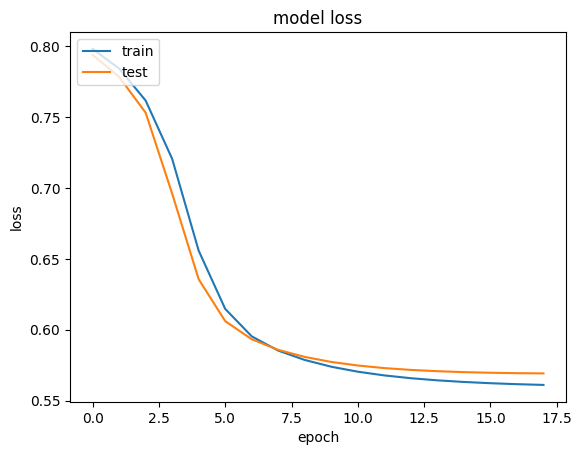

In [33]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

##Extracting weights from model

In [34]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

### **anime meta data**

In [35]:
df = pd.read_csv('anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [36]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')

    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'],
               inplace=True,
               ascending=False,
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version",
         "Score", "Genres", "Episodes",
         "Type", "Premiered", "Members"]]

In [37]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

### **sypnopsis data**

In [38]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv('anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

## **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [39]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest

        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)

            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

### **these animes are my fav**

![](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExajk0OHhjOTQyOTk2c2Nqbjc4Ynp0bXVnOTA3YnBjMjQ4YW15ODAwcCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/UTek0q3N8osh8agH4Y/giphy.webp)

In [46]:
find_similar_animes('One Piece Film Strong World', n=5, neg=False)

animes closest to One Piece Film Strong World


,name,similarity,genre,sypnopsis
4,One Piece Film Z,0.907279,"Action, Adventure, Comedy, Drama, Fantasy, Shounen","The Straw Hat Pirates enter the rough seas of the New World in search of the hidden treasures of the Pirate King, Gol D. Roger－One Piece. On their voyage, the pirates come across a terrifying, powerful man, former Marine Admiral Z. Z is accused of having stolen the ""Dyna Stones"", weapons believed to have the power to shake up the New World. The Marine Headquarters believes Z is about to use it to end the pirate era, and with it, the lives of many innocent people. In fear of such a phenomenal event, marines start to take action against the former admiral. Even if it means stumbling upon marines and the navy, the Straw Hat Pirates decided to chase after Z and stop him from causing havoc. As they continue to embark on their ventures, the pirates bump into new and familiar acquaintances."
3,One Piece Film: Strong World Episode 0,0.842139,"Action, Adventure, Comedy, Fantasy, Shounen, Super Power","Set over 20 years prior to the main One Piece story, this limited release OVA chronicles the confrontation between Gold Lion Shiki and Gold Roger as well as other events around the world around the time of the Pirate King's execution."
2,One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna,0.824127,"Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power","lling of the Arlong Park arc, with new animation."
1,One Piece 3D2Y: Ace no shi wo Koete! Luffy Nakama Tono Chikai,0.821328,"Adventure, Comedy, Fantasy, Shounen","fter suffering great personal loss during the battle of Marineford, Monkey D. Luffy finds himself stranded on Rusukaina, a treacherous island crawling with huge and dangerous creatures. There, he has committed himself to a two-year stretch of training to learn ""Haki,"" the energy that combatants can use to grant themselves a variety of abilities in battle. Luffy is jerked away from his otherwise peaceful training by the abduction of Sandersonia and Marigold, sisters of his friend and ally Boa Hancock. With Boa's aid, Luffy seeks to track down the infamous pirate responsible for the kidnapping, a man whose recent prison break is the result of Luffy's own reckless actions. Luffy must use his developing grasp of Haki to defeat this new foe while coming to terms with his overbearing grief in the process."
0,One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari,0.815787,"Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power","The story arcs aboard the Straw Hat Crew's first ship Going Merry (Merry Go in some adaptations) are recreated with brand-new animation, from Luffy and Usopp's fight and Robin's disappearance to the crew's final farewell to the ship. Going Merry is treated as another member of the Straw Hats as Luffy, Zoro, Nami, and the rest of the crew set sail for the legendary treasure, the One Piece. (Source: ANN)"


![](https://64.media.tumblr.com/1b942774dc6d4240cfbb3da22d99a681/tumblr_phsucvmeDT1sivxmj_500.gifv)

In [48]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,A Silent Voice,0.985056,"Drama, School, Shounen","s a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye. Now in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends. Koe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
3,Your Lie in April,0.971947,"Drama, Music, Romance, School, Shounen","usic accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. Two years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. Based on the manga series of the same name, Shigatsu wa Kimi no Uso approaches the story of Kousei's recovery as he discovers that music is more than playing each note perfectly, and a single melody can bring in the fresh spring air of April."
2,Code Geass:Lelouch of the Rebellion R2,0.960861,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
1,Clannad ~After Story~,0.952326,"Slice of Life, Comedy, Supernatural, Drama, Romance","Clannad: After Story , the sequel to the critically acclaimed slice-of-life series Clannad , begins after Tomoya Okazaki and Nagisa Furukawa graduate from high school. Together, they experience the emotional rollercoaster of growing up. Unable to decide on a course for his future, Tomoya learns the value of a strong work ethic and discovers the strength of Nagisa's support. Through the couple's dedication and unity of purpose, they push forward to confront their personal problems, deepen their old relationships, and create new bonds. Time also moves on in the Illusionary World. As the plains grow cold with the approach of winter, the Illusionary Girl and the Garbage Doll are presented with a difficult situation that reveals the World's true purpose. Based on the visual novel by Key and produced by Kyoto Animation, Clannad: After Story is an impactful drama highlighting the importance of family and the struggles of adulthood."
0,Demon Slayer:Kimetsu no Yaiba,0.950770,"Action, Demons, Historical, Shounen, Supernatural","Ever since the death of his father, the burden of supporting the family has fa

![](https://i.pinimg.com/originals/26/fd/49/26fd49fa54b204fbaf6301efefd53ae2.gif)

In [49]:
find_similar_animes('Sword Art Online', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genre,sypnopsis
4,Sword Art Online II,0.945587,"Action, Game, Adventure, Romance, Fantasy","ar after escaping Sword Art Online, Kazuto Kirigaya has been settling back into the real world. However, his peace is short-lived as a new incident occurs in a game called Gun Gale Online, where a player by the name of Death Gun appears to be killing people in the real world by shooting them in-game. Approached by officials to assist in investigating the murders, Kazuto assumes his persona of Kirito once again and logs into Gun Gale Online, intent on stopping the killer. Once inside, Kirito meets Sinon, a highly skilled sniper afflicted by a traumatic past. She is soon dragged in his chase after Death Gun, and together they enter the Bullet of Bullets, a tournament where their target is sure to appear. Uncertain of Death Gun's real powers, Kirito and Sinon race to stop him before he has the chance to claim another life. Not everything goes smoothly, however, as scars from the past impede their progress. In a high-stakes game where the next victim could easily be one of them, Kirito puts his life on the line in the virtual world once more."
3,Akame ga Kill!,0.912031,"Action, Adventure, Drama, Fantasy, Shounen","Night Raid is the covert assassination branch of the Revolutionary Army, an uprising assembled to overthrow Prime Minister Honest, whose avarice and greed for power has led him to take advantage of the child emperor's inexperience. Without a strong and benevolent leader, the rest of the nation is left to drown in poverty, strife, and ruin. Though the Night Raid members are all experienced killers, they understand that taking lives is far from commendable and that they will likely face retribution as they mercilessly eliminate anyone who stands in the revolution's way. This merry band of assassins' newest member is Tatsumi, a naïve boy from a remote village who had embarked on a journey to help his impoverished hometown and was won over by not only Night Raid's ideals, but also their resolve. Akame ga Kill! follows Tatsumi as he fights the Empire and comes face-to-face with powerful weapons, enemy assassins, challenges to his own morals and values, and ultimately, what it truly means to be an assassin with a cause."
2,Fairy Tail,0.904264,"Action, Adventure, Comedy, Magic, Fantasy, Shounen","In the mystical land of Fiore, magic exists as an essential part of everyday life. Countless magic guilds lie at the core of all magical activity, and serve as venues for like-minded mages to band together and take on job requests. Among them, Fairy Tail stands out from the rest as a place of strength, spirit, and family. Lucy Heartfilia is a young mage searching for celestial gate keys, and her dream is to become a full-fledged wizard by joining this famous guild. In her search, she runs into Natsu Dragneel and his partner Happy, who are on a quest to find Natsu's foster father, the dragon Igneel. Upon being tricked by a man, Lucy falls under an abduction attempt, only to be saved by Natsu. To her shock, he reveals that he is a member of Fairy Tail and invites her to join them. There, Lucy meets the guild's strange members, such as the ice wizard Gray Fullbuster and magic swordswoman Erza Scarlet. Together as a family, they battle the forces of evil, help those in need, and gain new friends, all the while enjoying the never-ending adventure that is Fairy Tail."
1,The Future Diary,0.899618,"Action, Mystery, Psychological, Shounen, Supernatural, Thriller","onely high school student, Yukiteru Amano, spends his days writing a diary on his cellphone, while conversing with his two seemingly imaginary friends Deus Ex Machina, who is the god of time and space, and Murmur, the god's servant. Revealing himself to be an actual entity, Deus grants Yukiteru a ""Random Diary,"" which shows highly descriptive entries based on the future and forces him into a bloody battle royale with 11 other holders of similarly powerful future diaries. With

![](https://steamuserimages-a.akamaihd.net/ugc/993512070845192516/C18040A95DB14DD58438DDDEBF721BA8ABAD0E84/)

In [50]:
find_similar_animes('Black Clover', n=5, neg=False)

animes closest to Black Clover


,name,similarity,genre,sypnopsis
4,Mahou Shoujo Lalabel: Umi ga Yobu Natsuyasumi,0.310668,"Slice of Life, Magic, Comedy, Shoujo","During the summer, Lalabel and her friends, Teko and Toko, arrived at the hostel owned by Teko's uncle. Teko's uncle and aunt have gone to the operation of their acquiantance, leaving their son, Ryota, to manage the hostel all by himself. Lalabel decides to help the boy out and together, all of them become involved in the management of the hostel. (Source: ANN)"
3,Kappapa,0.308063,"Comedy, Kids, Music",usic video for the song Kappapa by Yumi Kojima that was featured on Fuji TV's Hirake! Ponkikki program. The video was animated by Kouji Nanke.
2,Turning Girls,0.306128,"Comedy, Slice of Life",The story is about girls who face a battle against the turning point of their lives.
1,Highway Jenny,0.284916,Fantasy,"Various places in the world, trouble is awakening the terror inside every person's view of life, the distant future of overhead airspace is shown in ""Highway Jenny."" It compares existence with one's lifetime and afterlife, it contemplates the purity and death of future generations, and to the person who looks at the importance of the choices in their own life, it will be appealing. (Source: AnimeNfo)"
0,Happy-Go-Lucky Days,0.283433,"Slice of Life, Drama, Romance, Shoujo Ai, Shounen Ai","ove is love. Someday, the pain of being in love will be an endearing memory. No matter who the feelings are towards, no matter what form it takes, all love and lifestyles have the same value. An omnibus anime tells the stories of “The wedding of an ex”, “a student and a teacher at an all-boys’ school” and “childhood friends whose bodies and hearts change with adolescence.” (Source: Kotonoha)"


In [51]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Code Geass:Lelouch of the Rebellion R2,0.931062,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
3,Code Geass:Lelouch of the Rebellion,0.930197,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence. Lelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
2,Attack on Titan,0.926724,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga, Shingeki no Kyojin follows Eren, along with his adopted sister Mikasa Ackerman and his childhood friend Armin Arlert, as they join the brutal war against the titans and race to discover a way of defeating them before the last walls are breached."
1,Great Teacher Onizuka,0.894539,"Slice of Life, Comedy, Drama, School, Shounen","Twenty-two-year-old Eikichi Onizuka—ex-biker gang leader, conqueror of Shonan, and virgin—has a dream: to become the greatest high school teacher in all of Japan. This isn't because of a passion for teaching, but because he wants a loving teenage wife when he's old and gray. Still, for a perverted, greedy, and lazy delinquent, there is more to Onizuka than meets the eye. So when he lands a job as the homeroom teacher of the Class 3-4 at the prestigious Holy Forest Academy—despite suplexing the Vice Principal—all of his talents are put to the test, as this class is particularly infamous. Due to their utter contempt for all teachers, the class' students use psychological warfare to mentally break any 

## **Task 2**: Finding Similar Users (User Based Recommendation)

In [52]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 288569


In [53]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = df
        SimilarityArr = []

        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id,
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(name))

In [54]:
similar_users = find_similar_users(int(random_user),
                                   n=5,
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #288569


,similar_users,similarity
4,170906,0.459190
3,113395,0.444265
2,265457,0.441565
1,276941,0.437468
0,69530,0.436125


## **User preferences**

In [57]:
# !pip install wordcloud

In [58]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400,
                             background_color='white',
                             colormap='gnuplot').generate_from_frequencies(all_genres)

    plt.figure(figsize=(10,8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)

        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1
        if plot:
            showWordCloud(all_genres)

        return genres_list


def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )

    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]

    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))

        print('> preferred genres')

    if plot:
        getFavGenre(anime_df_rows, plot)

    return anime_df_rows#.eng_version.values

> User #288569 has rated 127 movies (avg. rating = 0.8)
> preferred genres


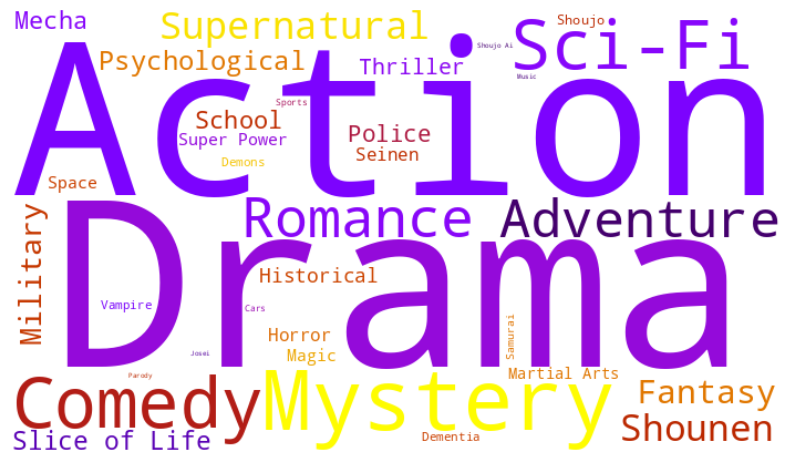

> animes highly rated by this user


,eng_version,Genres
3971,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen"
741,Legend of the Galactic Heroes,"Military, Sci-Fi, Space, Drama"
3537,Clannad ~After Story~,"Slice of Life, Comedy, Supernatural, Drama, Romance"
2656,Code Geass:Lelouch of the Rebellion R2,"Action, Military, Sci-Fi, Super Power, Drama, Mecha"
176,Spirited Away,"Adventure, Supernatural, Drama"


In [59]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

## **Task 3**: **Recommending** animes for a user

In [60]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)

    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)

    for i, anime_name in enumerate(sorted_list.index):
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name,
                                            "Genres": genre,
                                            "sypnopsis": sypnopsis})
            except:
                pass

    return pd.DataFrame(recommended_animes)

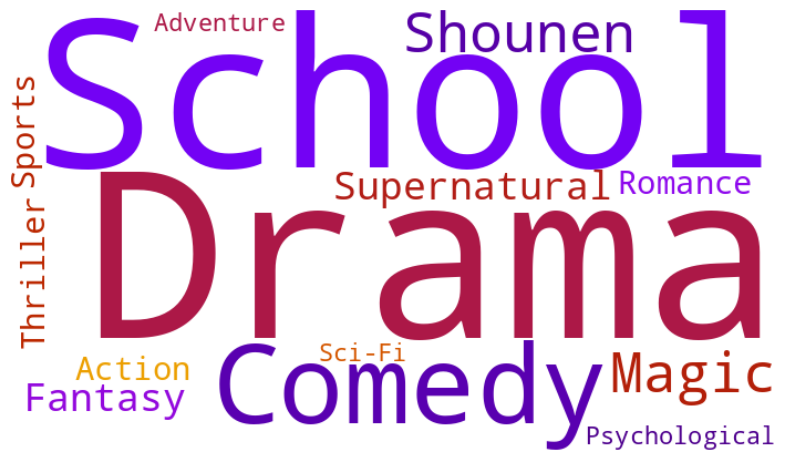


> Top recommendations for user: 288569


,n,anime_name,Genres,sypnopsis
0,9,Bakuman.,"Comedy, Drama, Romance, Shounen","Onto their third serialization, manga duo Moritaka Mashiro and Akito Takagi—also known by their pen name, Muto Ashirogi—are ever closer to their dream of an anime adaption. However, the real challenge is only just beginning: if they are unable to compete with the artist Eiji Niizuma in the rankings within the span of six months, they will be canceled. To top it off, numerous rivals are close behind and declaring war. They don't even have enough time to spare thinking about an anime! In Bakuman. 3rd Season , Muto Ashirogi must find a way to stay atop the colossal mountain known as the Shounen Jack rankings. With new problems and new assistants, the pair continue to strive for their dream."
1,5,Your Name.,"Romance, Supernatural, School, Drama","suha Miyamizu, a high school girl, yearns to live the life of a boy in the bustling city of Tokyo—a dream that stands in stark contrast to her present life in the countryside. Meanwhile in the city, Taki Tachibana lives a busy life as a high school student while juggling his part-time job and hopes for a future in architecture. One day, Mitsuha awakens in a room that is not her own and suddenly finds herself living the dream life in Tokyo—but in Taki's body! Elsewhere, Taki finds himself living Mitsuha's life in the humble countryside. In pursuit of an answer to this strange phenomenon, they begin to search for one another. Kimi no Na wa. revolves around Mitsuha and Taki's actions, which begin to have a dramatic impact on each other's lives, weaving them into a fabric held together by fate and circumstance."
2,5,Haikyu!! 3rd Season,"Comedy, Sports, Drama, School, Shounen","fter the victory against Aoba Jousai High, Karasuno High School, once called “a fallen powerhouse, a crow that can’t fly,” has finally reached the climax of the heated Spring tournament. Now, to advance to nationals, the Karasuno team has to defeat the powerhouse Shiratorizawa Academy. Karasuno’s greatest hurdle is their adversary’s ace, Wakatoshi Ushijima, the number one player in the Miyagi Prefecture, and one of the country’s top three aces. Only the strongest team will make it to the national tournament. Since this match is the third-year players’ last chance to qualify for nationals, Karasuno has to use everything they learned during the training camp and prior matches to attain victory. Filled with restlessness and excitement, both teams are determined to come out on top in the third season of Haikyuu!! ."
3,5,Steins;Gate,"Thriller, Sci-Fi","The self-proclaimed mad scientist Rintarou Okabe rents out a room in a rickety old building in Akihabara, where he indulges himself in his hobby of inventing prospective ""future gadgets"" with fellow lab members: Mayuri Shiina, his air-headed childhood friend, and Hashida Itaru, a perverted hacker nicknamed ""Daru."" The three pass the time by tinkering with their most promising contraption yet, a machine dubbed the ""Phone Microwave,"" which performs the strange function of morphing bananas into piles of green gel. Though miraculous in itself, the phenomenon doesn't provide anything concrete in Okabe's search for a scientific breakthrough; that is, until the lab members are spurred into action by a string of mysterious happenings before stumbling upon an unexpected success—the Phone Microwave can send emails to the past, altering the flow of history. Adapted from the critically acclaimed visual novel by 5pb. and Nitroplus, Steins;Gate takes Okabe through the depths of scientific theory and practicality. Forced across the diverging threads of past and present, Okabe must shoulder the burdens that come with holding the key to the realm of time."
4,5,Fate/Zero,"Action, Supernatural, Magic, Fantasy","h the promise of granting any wish, the omnipotent Holy Grail triggered three wars in the past, each too cruel and fierce to leave a victor. In spite of that, the wealthy Einzbern family is confident that

In [61]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes

## **Ranking based Recommendation**

In [62]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user]
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values)
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user2user_encoded.get(random_user)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched):
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])

    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue

        Results.append({#"anime_id": id_,
                        "name": name,
                        "pred_rating": rating,
                        "genre": genre,
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
Results

Showing recommendations for user: 288569
513/513 [==============================] - 1s 1ms/step
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
9,Gintama Season 4,0.891365,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen","Gintoki, Shinpachi, and Kagura return as the fun-loving but broke members of the Yorozuya team! Living in an alternate-reality Edo, where swords are prohibited and alien overlords have conquered Japan, they try to thrive on doing whatever work they can get their hands on. However, Shinpachi and Kagura still haven't been paid... Does Gin-chan really spend all that cash playing pachinko? Meanwhile, when Gintoki drunkenly staggers home one night, an alien spaceship crashes nearby. A fatally injured crew member emerges from the ship and gives Gintoki a strange, clock-shaped device, warning him that it is incredibly powerful and must be safeguarded. Mistaking it for his alarm clock, Gintoki proceeds to smash the device the next morning and suddenly discovers that the world outside his apartment has come to a standstill. With Kagura and Shinpachi at his side, he sets off to get the device fixed; though, as usual, nothing is ever that simple for the Yorozuya team. Filled with tongue-in-cheek humor and moments of heartfelt emotion, Gintama 's fourth season finds Gintoki and his friends facing both their most hilarious misadventures and most dangerous crises yet."
5,Gintama Season 2,0.888978,"Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen","fter a one-year hiatus, Shinpachi Shimura returns to Edo, only to stumble upon a shocking surprise: Gintoki and Kagura, his fellow Yorozuya members, have become completely different characters! Fleeing from the Yorozuya headquarters in confusion, Shinpachi finds that all the denizens of Edo have undergone impossibly extreme changes, in both appearance and personality. Most unbelievably, his sister Otae has married the Shinsengumi chief and shameless stalker Isao Kondou and is pregnant with their first child. Bewildered, Shinpachi agrees to join the Shinsengumi at Otae and Kondou's request and finds even more startling transformations afoot both in and out of the ranks of the the organization. However, discovering that Vice Chief Toushirou Hijikata has remained unchanged, Shinpachi and his unlikely Shinsengumi ally set out to return the city of Edo to how they remember it. With even more dirty jokes, tongue-in-cheek parodies, and shameless references, Gintama' follows the Yorozuya team through more of their misadventures in the vibrant, alien-filled world of Edo."
0,Gintama,0.887202,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen","The Amanto, aliens from outer space, have invaded Earth and taken over feudal Japan. As a result, a prohibition on swords has been established, and the samurai of Japan are treated with disregard as a consequence. However one man, Gintoki Sakata, still possesses the heart of the samurai, although from his love of sweets and work as a yorozuya, one might not expect it. Accompanying him in his jack-of-all-trades line of work are Shinpachi Shimura, a boy with glasses and a strong heart, Kagura with her umbrella and seemingly bottomless stomach, as well as Sadaharu, their oversized pet dog. Of course, these odd jobs are not always simple, as they frequently have run-ins with the police, ragtag rebels, and assassins, oftentimes leading to humorous but unfortunate consequences. Who said life as an errand boy was easy?"
7,Gintama:Enchousen,0.882751,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen","hile Gintoki Sakata was away, the Yorozuya found themselves a new leader: Kintoki, Gintoki's golden-haired doppelganger. In order to regain his former position, Gintoki will need the help of those around him, a troubling feat when no one can remember him! Between Kintoki and Gintoki, who will claim the throne as the main character? In addition, Yorozuya make a trip back down to red-light district of Yoshiwara to aid an elderly courtesan in her search for her long-lost lover. Although the district is no longer in chains be

In [63]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/content/anime_model.h5